Epoch 1/100
25/25 [==============================] - 1s 7ms/step - loss: 2564.3552 - val_loss: 2490.0972
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 2250.1760 - val_loss: 2110.4912
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 1763.5714 - val_loss: 1534.9034
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 1132.4473 - val_loss: 849.7771
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 540.4988 - val_loss: 333.2613
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 196.0500 - val_loss: 141.8799
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 118.6593 - val_loss: 121.8312
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 113.0685 - val_loss: 119.1755
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 109.6869 - val_loss: 115.9911
Epoch 10/100
25/25 [==============================] - 0s 2ms/step 

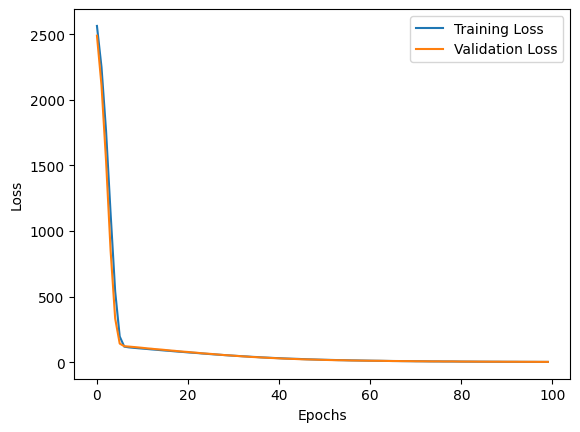

4/4 [==============================] - 0s 2ms/step - loss: 2.3731
Test Loss: 2.373131513595581
4/4 [==============================] - 0s 997us/step


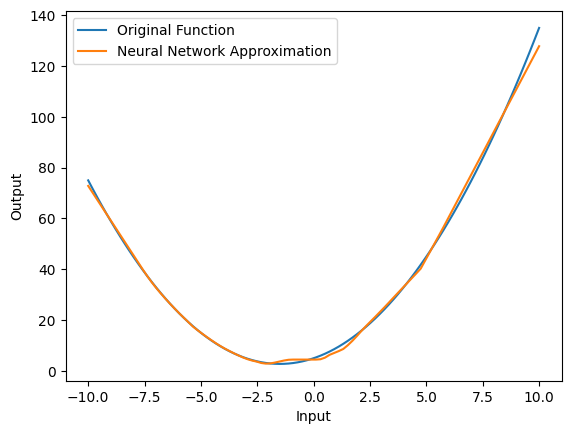

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf


def complex_function(x):
    
    return x**2 + 3*x + 5

# Generate data points for training
x_train = np.linspace(-10, 10, 1000)
y_train = complex_function(x_train)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on test data
x_test = np.linspace(-10, 10, 100)
y_test = complex_function(x_test)
loss = model.evaluate(x_test, y_test)
print("Test Loss:", loss)

# Visualize the original function and the neural network approximation
plt.plot(x_test, y_test, label='Original Function')
plt.plot(x_test, model.predict(x_test), label='Neural Network Approximation')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()


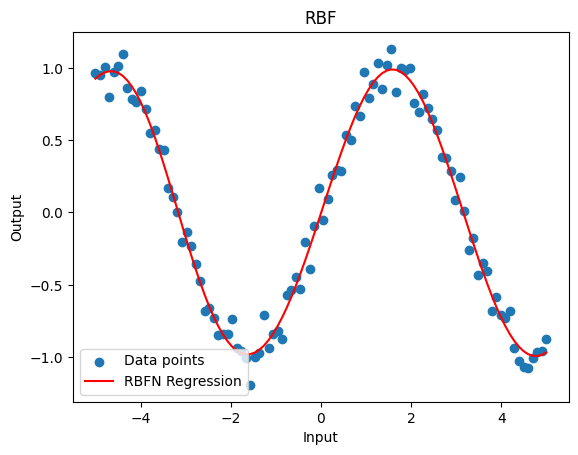

In [3]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = np.sin(X).ravel() + 0.1 * np.random.randn(100)
def rbf_kernel_function(x, c, s):
    rbf = np.exp(-0.5 * ((x - c) / s)**2)
    return rbf
def train():
    centers = np.linspace(-5, 5, 10)
    widths = 1.0
    rbf_kernel=rbf_kernel_function(X, centers, widths)
    phi = np.column_stack([rbf_kernel for c in centers])
    weights = np.linalg.lstsq(phi, y, rcond=None)[0]
    y_pred = phi.dot(weights)
    return y_pred
y_pred=train()
plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='RBFN Regression')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('RBF')
plt.legend()
plt.show()

4/4 [==============================] - 0s 2ms/step


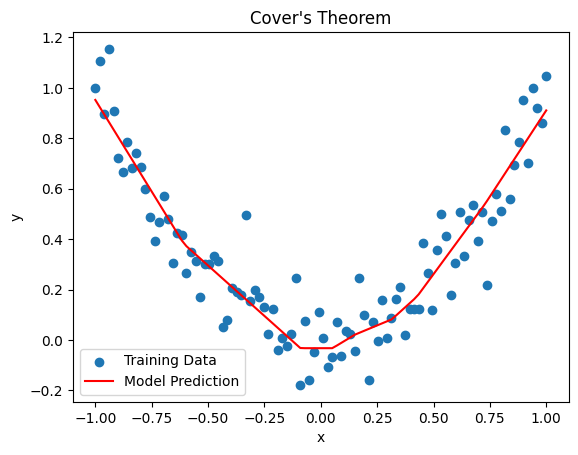

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def create_datasets():
    x_train = np.linspace(-1, 1, 100).reshape(-1, 1)
    y_train = x_train**2 + np.random.normal(0, 0.1, size=x_train.shape)
    return x_train, y_train

def train_model(x_train, y_train):
    model = tf.keras.Sequential([ tf.keras.layers.Dense(10, activation="relu", input_shape=(1,)), tf.keras.layers.Dense(1),])
    model.compile(optimizer="adam", loss="mse")
    model.fit(x_train, y_train, epochs=1000, verbose=0)
    return model

def plot_results(x_train, y_train, x_test, y_pred):
    plt.scatter(x_train, y_train, label="Training Data")
    plt.plot(x_test, y_pred, color="red", label="Model Prediction")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Cover's Theorem")
    plt.show()

x_train, y_train = create_datasets()
model = train_model(x_train, y_train)
y_pred = model.predict(np.linspace(-1, 1, 100).reshape(-1, 1))

plot_results(x_train, y_train, np.linspace(-1, 1, 100).reshape(-1, 1), y_pred)

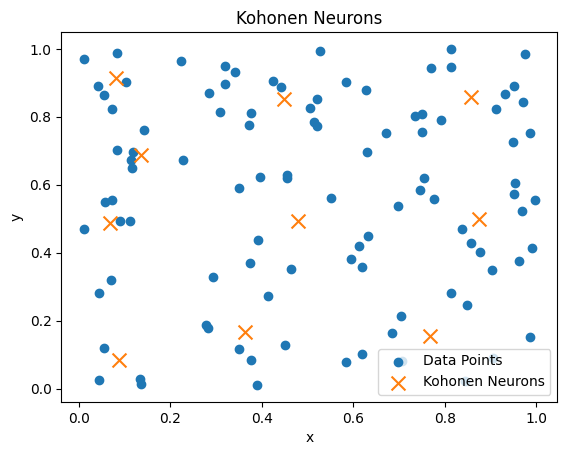

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class KohonenNetwork:
    def __init__(self, input_size, output_size, learning_rate, epochs):
        self.weights = np.random.rand(output_size, input_size)
        self.data_points = np.random.rand(100, input_size)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def train_model(self):
        for _ in range(self.epochs):
            for data_point in self.data_points:
                winner_index = np.argmin(np.linalg.norm(self.weights - data_point, axis=1))
                self.weights[winner_index] += self.learning_rate * (data_point - self.weights[winner_index])
        return self.data_points, self.weights

input_size = 2
output_size = 10
learning_rate = 0.1
epochs = 100

kohonen = KohonenNetwork(input_size, output_size, learning_rate, epochs)
data_points, weights = kohonen.train_model()

plt.scatter(data_points[:, 0], data_points[:, 1], label="Data Points")
plt.scatter(weights[:, 0], weights[:, 1], marker="x", s=100, label="Kohonen Neurons")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kohonen Neurons")
plt.show()

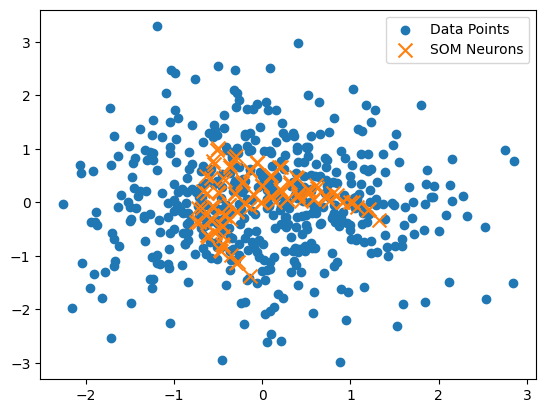

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class Som:
    def __init__(self, grid_size, epochs):
        self.weights = np.random.rand(grid_size, grid_size, 2)
        self.data_points = np.random.randn(500, 2)
        self.epochs = epochs

    def train(self, learning_rate=0.1):
        for _ in range(self.epochs):
            for data_point in self.data_points:
                winner = np.argmin(np.linalg.norm(self.weights - data_point, axis=2))
                neighborhood = np.exp(-np.linalg.norm(np.indices((grid_size, grid_size)).T- np.unravel_index(winner, (grid_size, grid_size)),axis=2,)/ 2)
                self.weights += (learning_rate* neighborhood[:, :, np.newaxis]* (data_point - self.weights))
        return self.data_points, self.weights

grid_size = 10
epochs = 1000

som = Som(grid_size, epochs)
_, weights = som.train()

plt.scatter(som.data_points[:, 0], som.data_points[:, 1], label="Data Points")
plt.scatter(weights[:, :, 0], weights[:, :, 1], marker="x", s=100, label="SOM Neurons")
plt.legend()
plt.show()